In [14]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd() )
print("mp", module_path)
# in standard python
#module_path = str(Path.cwd(__file__).parents[0] / "py")

if module_path not in sys.path:
    sys.path.append(module_path)


#import requests
#from pyaxis import pyaxis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mercury as mr
import data_helpers as dh
import plot_helpers as ph
api = "https://statbank.hagstova.fo:443/api/v1/fo/H2/IP/IP01/innt_nbs.px"

mp d:\dev\hagstova\git\hagtol\fo_area_hagtol


In [15]:


json_body_salary = {
  "query": [
    {
      "code": "unit",
      "selection": {
        "filter": "item",
        "values": [
          "DKK"
        ]
      }
    },
    {
      "code": "sex",
      "selection": {
        "filter": "item",
        "values": [
          "TOT",
#          "M",
#          "F"
        ]
      }
    },
    {
      "code": "region",
      "selection": {
        "filter": "item",
        "values": [
          "9999",
          "4100",
          "4200",
          "4300",
          "4700",
          "4400",
          "4500",
          "4600"
        ]
      }
    },
    {
      "code": "age",
      "selection": {
        "filter": "item",
        "values": [
          "Y_GE15"
          
        ]
      }
    },
    {
      "code": "year",
      "selection": {
        "filter": "item",
        "values": [
          "2020",
#          "2015",
#          "2010"
        ]
      }
    },
    {
      "code": "percentile intervals",
      "selection": {
        "filter": "item",
        "values": [
          "P1_AVG",
          "P25_AVG",
          "P50_AVG",
          "P75_AVG",
#          "P90_AVG",
#          "P95_AVG",
#          "P99_AVG",
          "P100_AVG"
        ]
      }
    }
  ],
  "response": {
    "format": "px"
  }
}



In [16]:
regions = dh.get_regions()

region = mr.Select(value="suduroy", choices=regions, label="Øki")

mercury.Select

In [17]:
municipality = mr.Select(choices= dh.get_municipalities(region.value), label="Kommuna")

mercury.Select

In [18]:
filter, value = dh.get_filter(region.value, municipality.value)
#print(filter, value)
#json_body_salary["query"][0]["selection"]["filter"] = filter
#json_body_salary["query"][0]["selection"]["values"] = [value]
#print("fv", filter, value, json_body)
df = dh.fetch_data("v1/fo/H2/IP/IP01/innt_nbs.px", json_body_salary, f"salery-data-{region.value}-{municipality.value}")
#df['date']=pd.to_datetime(df['month']+df['year'].astype(str),format='%b%Y')
df['value']=pd.to_numeric(df['DATA'])


load px_cache/salery-data-suduroy-Øll.px


   year                  region  10             25             50  \
0  2020           Total(region) NaN  168703.000000  282215.189728   
1  2020          Norðoya region NaN  168696.100000  267019.215510   
2  2020       Eysturoyar region NaN  168703.000000  280167.616044   
3  2020   Norðstreymoyar region NaN  168244.673226  278682.688065   
4  2020  Suðurstreymoyar region NaN  170497.768137  306109.534845   
5  2020             Vága region NaN  163514.269231  269819.171154   
6  2020         Sandoyar region NaN  165109.181818  251483.510000   
7  2020        Suðuroyar region NaN  159168.816216  241384.729459   

              75  90  
0  433940.702351 NaN  
1  419513.987143 NaN  
2  430770.801099 NaN  
3  428415.495667 NaN  
4  455396.763043 NaN  
5  424125.600800 NaN  
6  405857.128000 NaN  
7  389518.835278 NaN  


ValueError: Axis limits cannot be NaN or Inf

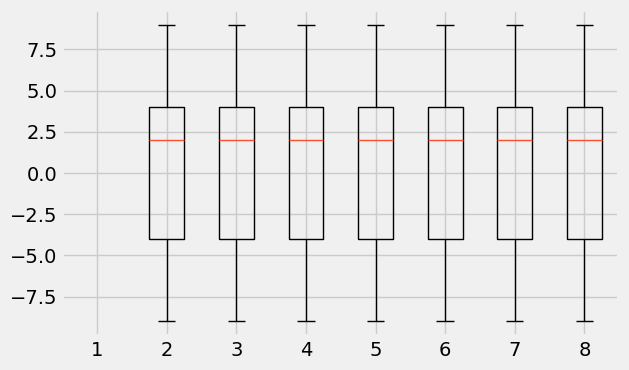

In [22]:
sdf = pd.DataFrame()

measure = "Gross income"
year = "2020"

fdf = df
sdf['year'] = fdf['year'].loc[(fdf["measure"] == measure ) & (fdf["sex"] == "Total (sex)") &(fdf["percentile intervals"] == "1" )].reset_index()['year']
sdf['region'] = fdf['region'].loc[(fdf["measure"] == measure ) & (fdf["sex"] == "Total (sex)") &(fdf["percentile intervals"] == "1" )].reset_index()['region']
#sdf['1'] =  fdf['value'].loc[(fdf["measure"] == measure ) & (fdf["sex"] == "Total (sex)") &(fdf["percentile intervals"] == "1" )].reset_index()['value']
sdf['10'] = fdf['value'].loc[(fdf["measure"] == measure ) & (fdf["sex"] == "Total (sex)") &(fdf["percentile intervals"] == "10" )].reset_index()['value']
sdf['25'] = fdf['value'].loc[(fdf["measure"] == measure ) & (fdf["sex"] == "Total (sex)") &(fdf["percentile intervals"] == "25" )].reset_index()['value']
sdf['50'] = fdf['value'].loc[(fdf["measure"] == measure ) & (fdf["sex"] == "Total (sex)") &(fdf["percentile intervals"] == "50" )].reset_index()['value']
sdf['75'] = fdf['value'].loc[(fdf["measure"] == measure ) & (fdf["sex"] == "Total (sex)") &(fdf["percentile intervals"] == "75" )].reset_index()['value']
sdf['90'] = fdf['value'].loc[(fdf["measure"] == measure ) & (fdf["sex"] == "Total (sex)") &(fdf["percentile intervals"] == "90" )].reset_index()['value']
#sdf['100'] = fdf['value'].loc[(fdf["measure"] == measure ) & (fdf["sex"] == "Total (sex)") &(fdf["percentile intervals"] == "100" )].reset_index()['value']
print(sdf)



gk = sdf.groupby("year")
#years = list(sdf["year"].drop_duplicates())
g = gk.get_group('2020')
bxf = pd.DataFrame()
bxf["label"] = g["region"]
bxf["median"] =  g['50']
bxf["mean"] =  g['50']
bxf[10] = g['10']
bxf[25] = g['25']
bxf[50] =  g['50']
bxf[75] = g['75']
bxf[90] = g['90']

box_data = []
for row in bxf.iterrows():
    #x = row[1]["label"]
    box_data.append([
        row[1]["label"][:-6],
        row[1][10],
        row[1][25],
        row[1][50],
        row[1][75],
        row[1][90],
        None
    ])
    
ph.box_plot_2(box_data, )
#out = boxplot(bxf)

print(gk.get_group('2020'))

gkr = sdf.groupby("region")

gkrx = gkr.get_group('Suðuroyar region')
#print(gkrx)

#print(gkr)

#gkr.get_group('2020').plot(x="year", figsize=(12,9), kind="box")
#gkrx.boxplot(x="year", figsize=(12,9))
plt.show()


